In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from matplotlib.colors import ListedColormap



np.set_printoptions(precision=5, suppress=True)

# Set random seed to student number
np.random.seed(46387334) # TODO: UNCOMMENT

In [3]:
# Helper functions
def sig_fig(X, sigfigs):
    exp = np.floor(ma.log10(abs(X)).filled(0))
    return np.round(X*10**-exp, sigfigs-1) * 10**exp

def get_diff(a1, a2):
    print(f"{a1.shape=}")
    print(f"{a2.shape=}")

    rows, cols = a1.shape
    for i in range(rows):
        for j in range(cols):
            print(f"[{i},{j}]: {round(a1[i, j], 3) :>5} vs {round(a2[i, j], 3) :>7}  |  Error: {(a1[i, j] - a2[i, j]) * (100 / a1[i, j])  :.2f}%")

## 2.d)

In [12]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from ucimlrepo import fetch_ucirepo 

# Fetch dataset from https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# Extract data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

# Transform the needed columns into the "normal" forms
X['logcp']    = np.log(X['creatinine_phosphokinase'])
X['sqrtplat'] = np.sqrt(X['platelets'])
X['recipsc']  = 1 / X['serum_creatinine']

# Redfine X to just be the 5 columns of interest
cols_to_keep = ['logcp', 'ejection_fraction', 'sqrtplat', 'recipsc', 'serum_sodium']
X_trans      = X[cols_to_keep]






# Compute the sample mean vector
mean = X_trans.mean(axis=0).values


print(mean)

# Compute the covariance matrix of the dataset
cov = np.cov(X_trans.T)
print(cov)


# Compute Mahalanobis distance for each data point
mahalanobis_distances = []
for i in range(X_trans.shape[0]):
    # Get data point i
    x_i = X_trans.iloc[i].values  

    # Compute mahalanobis distance using the given
    mahalanobis_dist = np.sqrt((x_i - mean ).T @ np.linalg.inv(cov) @ (x_i - mean ))
    mahalanobis_distances.append(mahalanobis_dist)

# Convert distances to a pandas Series to identify the point with the largest distance
mahalanobis_distances = pd.Series(mahalanobis_distances)

# Identify the point with the largest Mahalanobis distance
max_mahalanobis_index = mahalanobis_distances.idxmax()
max_mahalanobis_value = mahalanobis_distances[max_mahalanobis_index]

print(f"Point with the largest Mahalanobis distance: {max_mahalanobis_index}")
print(f"Largest Mahalanobis distance value: {max_mahalanobis_value}")
print(f"Point data:\n{X_trans.iloc[max_mahalanobis_index]}")


[  5.6599   38.08361 504.60886   0.89101 136.62542]
[[   1.28695   -0.92809    1.00642    0.02347    0.09529]
 [  -0.92809  140.06346   77.79812    0.51429    9.18579]
 [   1.00642   77.79812 8757.21763    1.82282   23.00411]
 [   0.02347    0.51429    1.82282    0.10035    0.35448]
 [   0.09529    9.18579   23.00411    0.35448   19.46996]]
Point with the largest Mahalanobis distance: 199
Largest Mahalanobis distance value: 5.595096595740964
Point data:
logcp                  7.099202
ejection_fraction     35.000000
sqrtplat             513.184207
recipsc                0.555556
serum_sodium         113.000000
Name: 199, dtype: float64


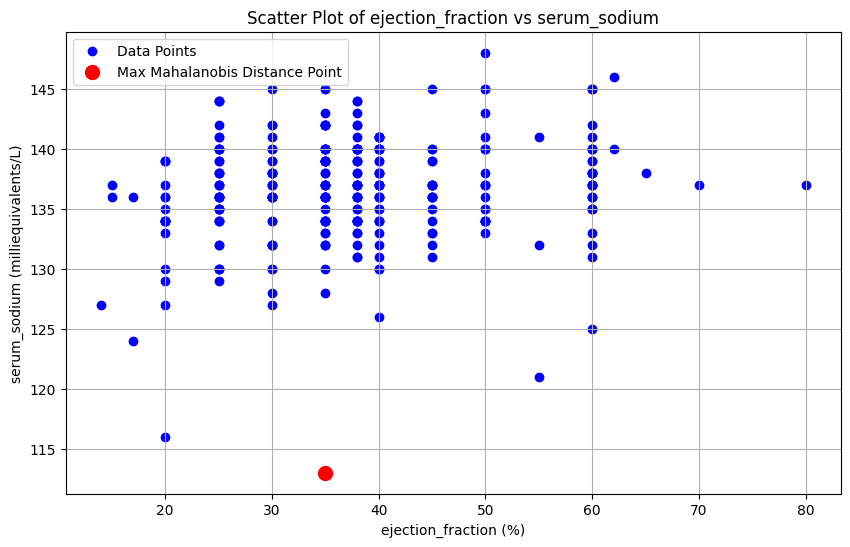

In [11]:
import matplotlib.pyplot as plt

# Choose two features to plot
feature_x = 'ejection_fraction'
feature_y = 'serum_sodium'

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_trans[feature_x], X_trans[feature_y], c='blue', label='Data Points')

# Highlight the point with the largest Mahalanobis distance
plt.scatter(X_trans.loc[max_mahalanobis_index, feature_x], 
            X_trans.loc[max_mahalanobis_index, feature_y], 
            c='red', s=100, label='Max Mahalanobis Distance Point')

# Add labels and title
plt.xlabel(feature_x + " (%)")
plt.ylabel(feature_y + " (milliequivalents/L)")
plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
plt.legend()
plt.grid(True)

# Annotate the point with the largest Mahalanobis distance
# plt.annotate(f'Largest Mahalanobis\nDistance: {max_mahalanobis_value:.2f}', 
#              xy=(X_trans.loc[max_mahalanobis_index, feature_x], X_trans.loc[max_mahalanobis_index, feature_y]),
#              xytext=(10, -10), textcoords='offset points', fontsize=12, color='red', arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


In [17]:
import numpy as np

# Define the vectors
vector_a = np.array([7.0992, 35.000, 513.18, 0.55556, 113.00])
vector_b = np.array([5.66, 38.1, 505, 0.891, 137])

# Calculate the difference
result = vector_a - vector_b


# Define the inverse matrix
inverse_matrix = np.array([
    [0.7837, 0.0062, -0.000095, -0.2038, -0.0029],
    [0.0062, 0.0075, -0.000054, -0.0285, -0.0030],
    [-0.000095, -0.000054, 0.000115, -0.0015, -0.000083],
    [-0.2038, -0.0285, -0.0015, 10.8626, -0.1810],
    [-0.0029, -0.0030, -0.000083, -0.1810, 0.0561]
])

ss = result.T @ inverse_matrix @ result
print(ss)
print(np.sqrt(ss))


32.202041401292156
5.674684255647371


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from ucimlrepo import fetch_ucirepo 

# Fetch dataset from https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# Extract data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

# Transform the needed columns into the "normal" forms
X['logcp']    = np.log(X['creatinine_phosphokinase'])
X['sqrtplat'] = np.sqrt(X['platelets'])
X['recipsc']  = 1 / X['serum_creatinine']

# Redfine X to just be the 5 columns of interest
cols_to_keep = ['logcp', 'ejection_fraction', 'sqrtplat', 'recipsc', 'serum_sodium']
X_trans      = X[cols_to_keep]






# Compute the sample mean vector
mean = X_trans.mean(axis=0).values


print(mean)

# Compute the covariance matrix of the dataset
cov = np.cov(X_trans.T)
print(cov)


# Compute Mahalanobis distance for each data point
mahalanobis_distances = []

i = 199

# Get data point i
x_i = X_trans.iloc[i].values  

# Compute mahalanobis distance using the given
mahalanobis_dist = np.sqrt((x_i - mean ).T @ np.linalg.inv(cov) @ (x_i - mean ))
mahalanobis_distances.append(mahalanobis_dist)

